In [1]:
import pandas as pd
import numpy as np

# Part A

In [35]:
def generate_brownian(N,L):
    out=pd.DataFrame(index=range(N),columns=range(L))
    out.loc[0]=0
    for i in range(L):
        randn=np.random.normal(size=N-1)
        out.loc[1:,i]=np.cumsum(randn)/np.sqrt(N)
    index=np.linspace(0,1,N)
    out.index=index
    return out

In [36]:
o=generate_brownian(100,3)

In [37]:
%matplotlib inline

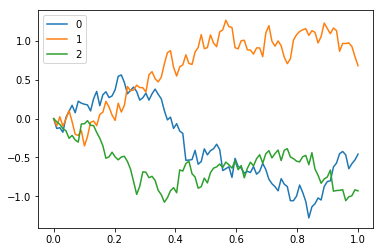

In [38]:
o.plot()

# Part B

In [39]:
def passage_time(path,m):
    ix=path.index
    path=path.reset_index()
    path=path[path.columns[1]]
    passage_eval=path.loc[path>m]
    reflected_path=path.copy()
    if len(passage_eval)>0:
        passage_time=passage_eval.index[0]
        reflected_path.iloc[passage_time-1:]=2*m-reflected_path.iloc[passage_time-1:]
    else:
        passage_time=np.inf
    reflected_path=pd.Series(data=reflected_path.values,index=ix)
    return passage_time,reflected_path

In [40]:
time,r_path=passage_time(o[1],5)

In [41]:
time

inf

# Part C

In [6]:
import time

In [10]:
def brownian_motion(N,L):
    motions = np.zeros((L,N))
    start=time.time()
    for i in range(0,L): 
        path = []
        path.append(0)
        for j in range(1, N): 
            path.append(np.random.normal(size = 1))
        motions[i] = path 
    motions = motions.T
    return motions 

In [ ]:
b_paths=brownian_motion(int(10e5),1000)

In [ ]:
b_path_s=pd.DataFrame(index=np.linspace(0,1,1000),columns=range(10000),data=b_paths.T)

In [33]:
for i in [0.5,1,2]:
    cross_count=0
    cross_time=[]
    for j in b_path_s.columns:
        r,_=passage_time(b_path_s[j],i)
        if r!=np.inf:
            cross_count+=1
            cross_time.append(r)
    cross_time=np.array(cross_time)
    print(str(i)+": "+str(cross_count/float(1000)))
    print(str(i)+": "+str(np.mean(cross_time)))

0.5: 6.046
0.5: 328.438802514
1: 3.059
1: 526.945080092
2: 0.441
2: 740.349206349


# Part D

In [46]:
b_paths=generate_brownian(100,3)

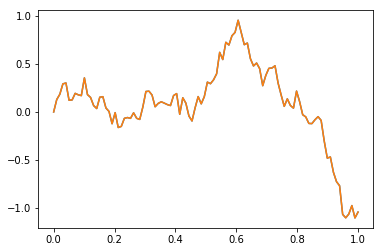

In [47]:
b_paths[0].plot()
m,r_path=passage_time(b_paths[0],1)
r_path.plot()

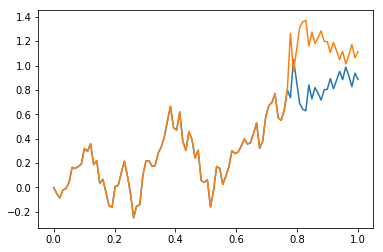

In [48]:
b_paths[1].plot()
m,r_path=passage_time(b_paths[1],1)
r_path.plot()

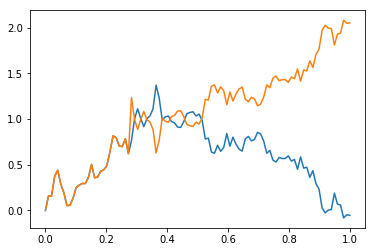

In [49]:
b_paths[2].plot()
m,r_path=passage_time(b_paths[2],1)
r_path.plot()

# Part E

## 1

In [50]:
o=generate_brownian(50,5)

In [51]:
def weiner_sausage(paths,a,b):
    ix=paths.index
    out_paths=paths.copy()
    out_paths=out_paths.reset_index()
    del out_paths['index']
    for i in out_paths.columns:
        path=out_paths[i]
        for j in path.index:
            if path.iloc[j]>b:
                path.iloc[j:]=2*b-path.iloc[j:]
            elif path.iloc[j]<a:
                path.iloc[j:]=2*a-path.iloc[j:]
        out_paths[i]=path
    return out_paths

In [52]:
out_paths=weiner_sausage(o,-1,1)

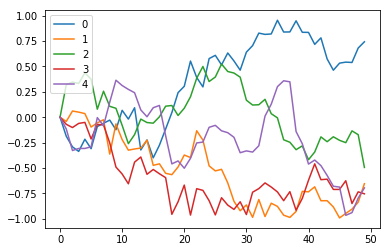

In [53]:
out_paths.plot()

## 2

In [54]:
o=generate_brownian(50,1000)

In [55]:
def weiner_sausage_count(paths,a,b):
    first_array=[]
    count_array=[]
    for i in paths.columns:
        first=True
        first_index=0
        count=0
        path=paths[i]
        for j in path.index:
            if path.loc[j]>b:
                if first:
                    first_index=j
                    first=False
                count+=1
            elif path.loc[j]<a:
                if first:
                    first_index=j
                    first=False
                count+=1
        first_array.append(first_index)
        count_array.append(count)
    return first_array,count_array

In [56]:
first,count=weiner_sausage_count(o,-1,1)

In [57]:
first=np.array(first)
count=np.array(count)

In [58]:
np.mean(count)

7.3360000000000003

In [59]:
np.mean(first)

0.31924489795918365

## 3

In [63]:
path_b=b_path_s[0].values

In [64]:
path_b[(path_b>1) | (path_b<-1)]

array([], dtype=float64)

In [73]:
length=0
for i in b_path_s.columns:
    path_b=b_path_s[i].values
    if len(path_b[(path_b>1) | (path_b<-1)])>0:
        length+=1

In [74]:
length/float(10000)

0.6107